In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [83]:
final_epoch_resnet18_d2 = torch.load('/content/gdrive/MyDrive/AI Project/FlowerDataset/model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']
final_epoch_vgg16_d2 = torch.load('/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset2/dataset2_pth/d2_vgg16_model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']
final_epoch_mobilenet_d2 = torch.load('/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset2/dataset2_pth/d2_mnv2_model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']

In [85]:
final_epoch_resnet18_d1 = torch.load('/content/gdrive/MyDrive/AI Project/model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']
final_epoch_vgg16_d1 = torch.load('/content/gdrive/MyDrive/AI Project/d1_vgg16_model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']
final_epoch_mobilenet_d1 = torch.load('/content/gdrive/MyDrive/AI Project/d1_mnv2_model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']

In [87]:
final_epoch_resnet18_d3 = 28
final_epoch_vgg16_d3 = torch.load('/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset3/dataset3_pth/d3_vgg16_model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']
final_epoch_mobilenet_d3 = torch.load('/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset3/dataset3_pth/d3_mnv2_model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']

In [89]:
d1_resnet18 = '/content/gdrive/MyDrive/AI Project/Dataset1_Resnet_metrics.npy', 
d1_vgg16 = '/content/gdrive/MyDrive/AI Project/Dataset1_VGG16_metrics.npy', 
d1_mnv2 = '/content/gdrive/MyDrive/AI Project/Dataset1_MNV2_metrics.npy'

d3_resnet18 = '/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset3/dataset3_npy/Dataset3_Resnet_metrics.npy', 
d3_vgg16 = '/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset3/dataset3_npy/Dataset3_VGG16_metrics.npy', 
d3_mnv2 = '/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset3/dataset3_npy/Dataset3_MNV2_metrics.npy'

d2_resnet18 = '/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset2/dataset2_npy/Dataset2_MNV2_metrics.npy', 
d2_vgg16 = '/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset2/dataset2_npy/Dataset2_VGG16_metrics.npy', 
d2_mnv2 = '/content/gdrive/MyDrive/AI Project/FlowerDataset/dataset2/dataset2_npy/Dataset2_MNV2_metrics.npy'

In [102]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(final_epoch_resnet18_d1,final_epoch_vgg16_d1,final_epoch_mobilenet_d1,
                 final_epoch_resnet18_d2,final_epoch_vgg16_d2,final_epoch_mobilenet_d2,
                 final_epoch_resnet18_d3,final_epoch_vgg16_d3,final_epoch_mobilenet_d3,
                 d1_resnet18, d1_vgg16, d1_mnv2,
                 d2_resnet18, d2_vgg16, d2_mnv2,
                 d3_resnet18, d3_vgg16, d3_mnv2):
    
    def plot_model_performance(model_name, epochs, dataset_names, model_data):
        #print(epochs)
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        colors = ['blue', 'black', 'red']
        
        for i, dataset_name in enumerate(dataset_names):
            data = np.array(model_data[i])
            print(dataset_name)
            train_loss = data[:, 1][:epochs[i]]
            val_loss = data[:, 2][:epochs[i]]
            train_accuracy = data[:, 3][:epochs[i]]
            val_accuracy = data[:, 4][:epochs[i]]
            
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
            #print(len(train_loss))
            #print(range(1, epochs[i]+1))
            plt.plot(range(1, epochs[i]+1), train_loss, label=f"{dataset_name} Train Loss", color=colors[i])
            plt.plot(range(1, epochs[i]+1), val_loss, linestyle='--', label=f"{dataset_name} Val Loss", color=colors[i])
            #print('stuck here')

            #print('Here')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{model_name} Train and Validation Loss for All Datasets')
        plt.legend()
        plt.show()
        
        plt.plot(range(1, epochs[0]+1), train_accuracies[0], label=f"{dataset_names[0]} Train Accuracy", color=colors[0])
        plt.plot(range(1, epochs[0]+1), val_accuracies[0], linestyle='--', label=f"{dataset_names[0]} Val Accuracy", color=colors[0])
        plt.plot(range(1, epochs[1]+1), train_accuracies[1], label=f"{dataset_names[1]} Train Accuracy", color=colors[1])
        plt.plot(range(1, epochs[1]+1), val_accuracies[1], linestyle='--', label=f"{dataset_names[1]} Val Accuracy", color=colors[1])
        plt.plot(range(1, epochs[2]+1), train_accuracies[2], label=f"{dataset_names[2]} Train Accuracy", color=colors[2])
        plt.plot(range(1, epochs[2]+1), val_accuracies[2], linestyle='--', label=f"{dataset_names[2]} Val Accuracy", color=colors[2])
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'{model_name} Train and Validation Accuracy for All Datasets')
        plt.legend()
        plt.show()

        #print('Done')
        
    #print(d1_resnet18)
    d1_resnet18 = np.load(d1_resnet18[0])
    d2_resnet18 = np.load(d2_resnet18[0])
    d3_resnet18 = np.load(d3_resnet18[0])

    d1_vgg16 = np.load(d1_vgg16[0])
    d2_vgg16 = np.load(d2_vgg16[0])
    d3_vgg16 = np.load(d3_vgg16[0])
    

    #print(d1_mnv2)
    d1_mnv2 = np.load(d1_mnv2)
    d2_mnv2 = np.load(d2_mnv2)
    d3_mnv2 = np.load(d3_mnv2)

    dataset_names = ["Dataset 1", "Dataset 2", "Dataset 3"]
    resnet_data = [d1_resnet18, d2_resnet18, d3_resnet18]
    vgg_data = [d1_vgg16, d2_vgg16, d3_vgg16]
    mobilenet_data = [d1_mnv2, d2_mnv2, d3_mnv2]
    model_names = ["ResNet18", "VGG16", "MobileNetV2"]


    epochs = [
        final_epoch_resnet18_d1, final_epoch_resnet18_d2, final_epoch_resnet18_d3,
        final_epoch_vgg16_d1, final_epoch_vgg16_d2, final_epoch_vgg16_d3,
        final_epoch_mobilenet_d1, final_epoch_mobilenet_d2, final_epoch_mobilenet_d3
        ]

    #print(epochs)

 

    for i, model_name in enumerate(model_names):
      if i == 0:
          model_data = resnet_data
      elif i == 1:
          model_data = vgg_data
      else:
          model_data = mobilenet_data
      print(model_name)
      plot_model_performance(model_name, epochs[i*3:i*3+3], dataset_names, model_data)




ResNet18
Dataset 1
Dataset 2
Dataset 3


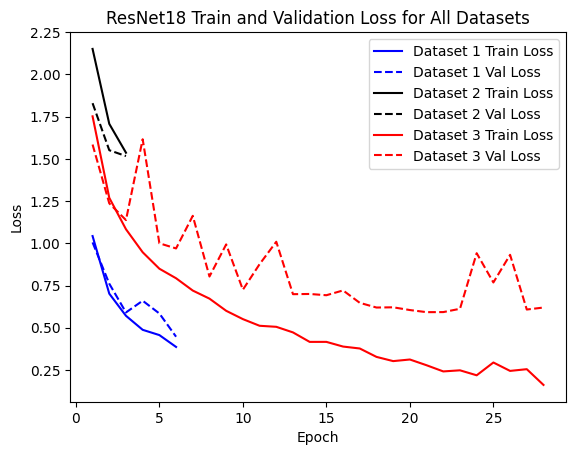

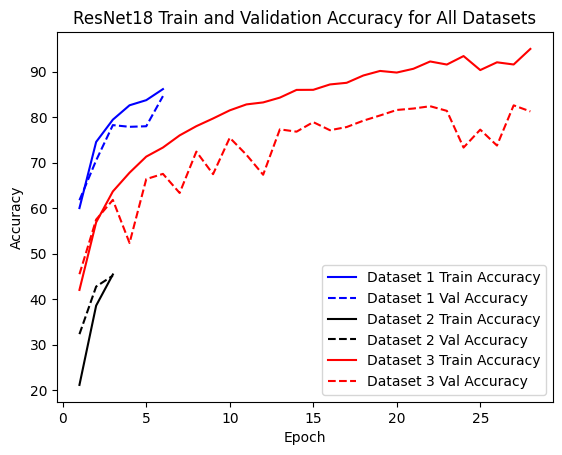

VGG16
Dataset 1
Dataset 2
Dataset 3


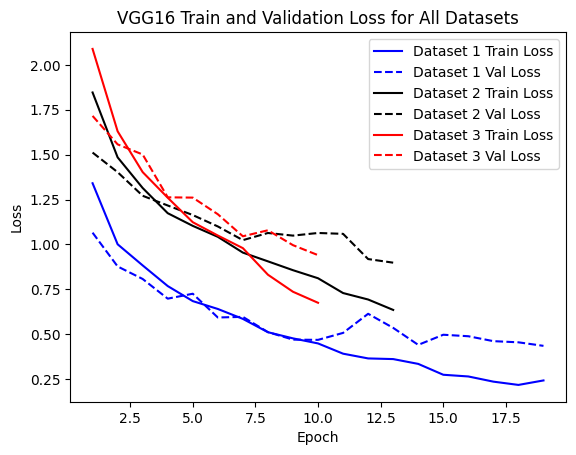

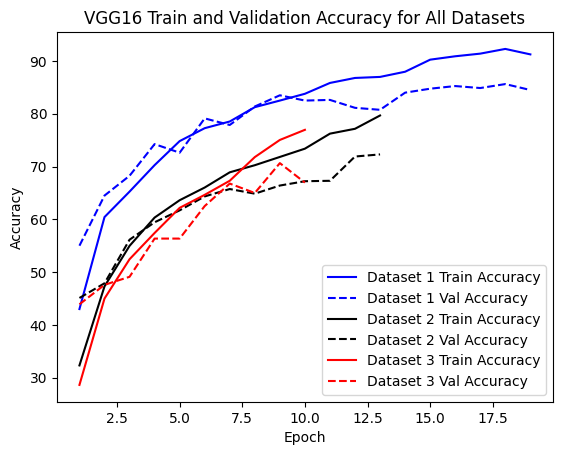

MobileNetV2
Dataset 1
Dataset 2
Dataset 3


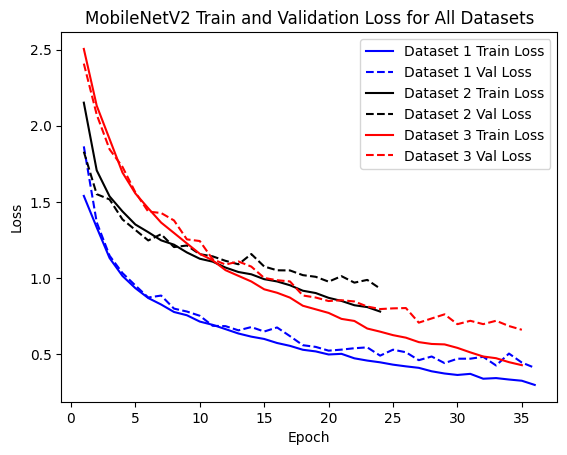

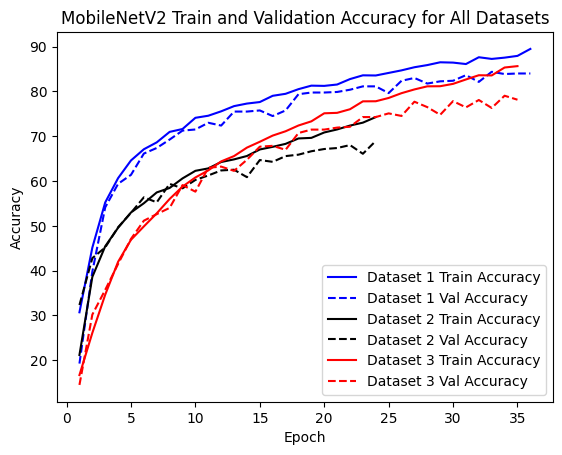

In [103]:
plot_metrics(final_epoch_resnet18_d1,final_epoch_vgg16_d1,final_epoch_mobilenet_d1,
             final_epoch_resnet18_d2,final_epoch_vgg16_d2,final_epoch_mobilenet_d2,
             final_epoch_resnet18_d3,final_epoch_vgg16_d3,final_epoch_mobilenet_d3,
             d1_resnet18, d1_vgg16, d1_mnv2,
             d2_resnet18, d2_vgg16, d2_mnv2,
             d3_resnet18, d3_vgg16, d3_mnv2)